**To change Dockerfile name and can build image from it:**  

`docker build -f Dockerfile.dev .`

**Every change in the code requires rebuilding the image then recreate the container so we use Docker Volumes**

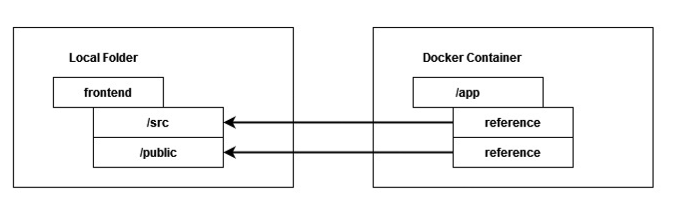

**Docker Volumes**

`docker run -p 3000:3000 -v /app/node_modules -v $(pwd):/app <image - name/tag/id>`

-   **First `-v $(pwd):/app`** → Mounts your project into `/app`.
-   **Second `-v /app/node_modules`** → Creates **an anonymous volume** for `node_modules`, preventing it from being overwritten by the empty host directory.

So now:  
✅ Your project files sync between host & container.  
✅ `node_modules` stays isolated inside the container.  
✅ Performance is much better.

**Notes:**

If we changed dockerfile name and want to handle that in docker-compose file so we will use:
```yaml 
build:
  context: .
  dockerfile: Dockerfile.dev
  ```
  
If not so will be:
```yaml
build: .
```
**Why we still need to use `COPY . .` in Dockerfile and also  `volumes` in docker-compose file?**

-   `COPY . .` ensures the Docker image has the code when it’s built. If you deploy this image somewhere else without `docker-compose`, the code is still there.
-   `volumes` ensures your changes reflect live during development without needing to rebuild the image every time you change the code.

**In short:**

-   `COPY . .` → for building the image (especially for production).
-   `volumes` → for live development, so changes are instant and local dependencies don’t mess things up.

**To run command on specific container and override default start command**

`docker run <image id> npm run test`

**-it flag, gives us much more full screen experience:**

`docker run -it <image id> npm run test`


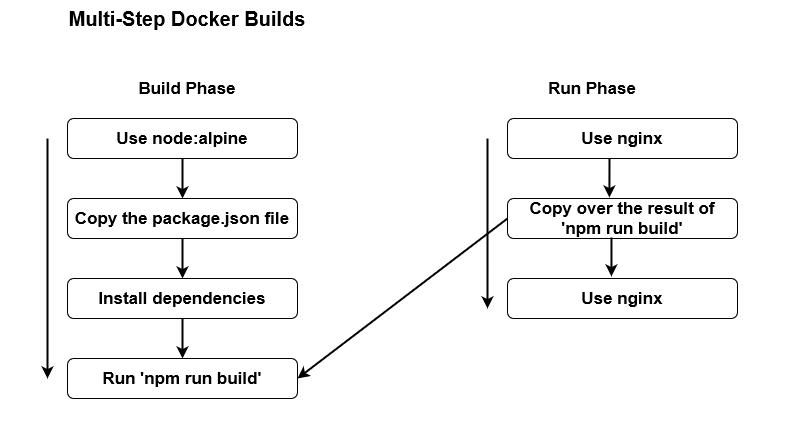